In [1]:
import json
with open("paper_title_abstract_bodytext.json") as f:
    data=json.load(f)

In [2]:
print(len(data))

68204


In [3]:
#Merged abstract and body-text of a paper as doc
text={}
text["text"]=[i["abstract"].lower()+" "+i["body_text"].lower() for i in data]

In [4]:
#Took 2000 Research Papers for modelling 
print(len(text["text"]))
cleaned_data=text["text"][:400]+text["text"][2000:2400]+text["text"][20000:20400]+text["text"][40000:40400]+text["text"][67800:68200]
print(len(cleaned_data))

68204
2000


In [5]:
#Removing extra spacing
def remove_extra_spaces(s):
    s=s.strip()
    s=s.split()
    return " ".join(s)
cleaned_text=[remove_extra_spaces(i) for i in cleaned_data]

In [6]:
"""
Not performing stemming coz it is earasing important info abount tha data coronavirus->coronaviru etc a lot like this
"""
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
def tokensex(s):
    ps = PorterStemmer() 
    sentence=[]
    words = word_tokenize(s)
    for w in words: 
        sentence.append(ps.stem(w))
    return " ".join(sentence)
tokenized_data=[tokensex(i) for i in cleaned_text]

In [7]:
len(tokenized_data)

2000

In [8]:
"""
It is to check and remove redundent repeating words like preprint journel and all of them are mentioned in bekar
pool=[]
print(len(tokenized_data[0]))
for i in tokenized_data:
    for j in i:
        pool.append(j)
from collections import Counter
counts = Counter(pool)
counts.most_common(100)"""

'\nIt is to check and remove redundent repeating words like preprint journel and all of them are mentioned in bekar\npool=[]\nprint(len(tokenized_data[0]))\nfor i in tokenized_data:\n    for j in i:\n        pool.append(j)\nfrom collections import Counter\ncounts = Counter(pool)\ncounts.most_common(100)'

In [9]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')
bekar="preprint license copyright author/funder word count text https doi figure holder data cases medrxiv biorxiv made time may study high total population number granted used using also international fig cc-by-nc-nd rights reserved peer-reviewed"
def clean_text(text):
    tokenized_text = word_tokenize(text)
    cleaned_text = [t for t in tokenized_text if t not in STOPWORDS and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t) and t not in bekar]
    return cleaned_text

tokens_data = []
for t in tokenized_data:
    tokens_data.append(clean_text(t))
 


In [10]:
# Fitted LDA
NUM_TOPICS=10
dictionary = corpora.Dictionary(tokens_data)
print(len(dictionary))
corpus = [dictionary.doc2bow(t) for t in tokens_data]
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)


121819


In [12]:
for idx in range(NUM_TOPICS):
    print("\nTopic #%s:" % idx, lda_model.print_topic(idx, 50))


Topic #0: 0.013*"cell" + 0.008*"thi" + 0.007*"infect" + 0.007*"protein" + 0.006*"viru" + 0.005*"studi" + 0.004*"viral" + 0.004*"patient" + 0.004*"gene" + 0.003*"test" + 0.003*"sequenc" + 0.003*"differ" + 0.003*"diseas" + 0.003*"detect" + 0.003*"result" + 0.003*"express" + 0.003*"activ" + 0.003*"group" + 0.003*"show" + 0.003*"includ" + 0.003*"effect" + 0.003*"human" + 0.003*"vaccin" + 0.003*"howev" + 0.003*"increas" + 0.003*"sampl" + 0.003*"virus" + 0.003*"level" + 0.002*"report" + 0.002*"respons" + 0.002*"rate" + 0.002*"model" + 0.002*"two" + 0.002*"dure" + 0.002*"immun" + 0.002*"strain" + 0.002*"one" + 0.002*"observ" + 0.002*"control" + 0.002*"sever" + 0.002*"compar" + 0.002*"analysi" + 0.002*"develop" + 0.002*"structur" + 0.002*"bind" + 0.002*"region" + 0.002*"caus" + 0.002*"addit" + 0.002*"est" + 0.002*"follow"

Topic #1: 0.009*"thi" + 0.008*"studi" + 0.005*"infect" + 0.004*"patient" + 0.004*"diseas" + 0.004*"result" + 0.004*"test" + 0.004*"cell" + 0.004*"sampl" + 0.003*"observ" + 

In [14]:
papertopic={}
for i,t in enumerate(cleaned_text):
    result=lda_model[dictionary.doc2bow(clean_text(t))]
    maxresult=result[0][1]
    for j in result:
        if j[1]>maxresult:
            maxresult=j[1]
    topic=[j[0] for j in result if j[1]==maxresult][0]
    papertopic[str(i)]=topic
        

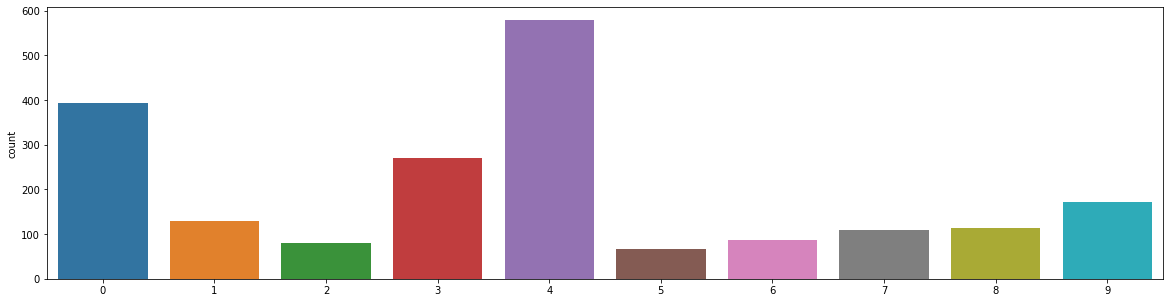

In [15]:
freq=[j for j in papertopic.values()]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.countplot(freq)

In [43]:
def extract_topic(p,topic_num):
    topic=[]
    for i in p.keys():
        if p[i]==topic_num:
            topic.append(int(i))
    return topic
topic0=extract_topic(papertopic,0)
topic1=extract_topic(papertopic,1)
topic2=extract_topic(papertopic,2)
topic3=extract_topic(papertopic,3)
topic4=extract_topic(papertopic,4)
topic5=extract_topic(papertopic,5)
topic6=extract_topic(papertopic,6)
topic7=extract_topic(papertopic,7)
topic8=extract_topic(papertopic,8)
topic9=extract_topic(papertopic,9)

In [44]:
#Here i have tried to make heading from paper Title in those topic+common words in those topic
paper_topic1=[data[i]["title"] for i in topic1]
paper_topic5=[data[i]["title"] for i in topic5]
print("Most Common words:",lda_model.print_topic(1, 50))
print("\nPaper Catogarized in this topic")
for i in paper_topic1:
    print(i)

Most Common words: 0.009*"thi" + 0.008*"studi" + 0.005*"infect" + 0.004*"patient" + 0.004*"diseas" + 0.004*"result" + 0.004*"test" + 0.004*"cell" + 0.004*"sampl" + 0.003*"observ" + 0.003*"virus" + 0.003*"group" + 0.003*"activ" + 0.003*"differ" + 0.003*"report" + 0.003*"viral" + 0.003*"protein" + 0.003*"viru" + 0.003*"two" + 0.003*"includ" + 0.003*"one" + 0.002*"human" + 0.002*"health" + 0.002*"clinic" + 0.002*"level" + 0.002*"caus" + 0.002*"valu" + 0.002*"day" + 0.002*"dure" + 0.002*"strain" + 0.002*"increas" + 0.002*"identifi" + 0.002*"respiratori" + 0.002*"detect" + 0.002*"present" + 0.002*"onli" + 0.002*"howev" + 0.002*"gener" + 0.002*"found" + 0.002*"model" + 0.002*"tabl" + 0.002*"posit" + 0.002*"show" + 0.002*"perform" + 0.002*"sequenc" + 0.002*"sever" + 0.002*"anim" + 0.002*"suggest" + 0.002*"avail" + 0.002*"associ"

Paper Catogarized in this topic
The RNA pseudoknots in foot-and-mouth disease virus are dispensable for genome replication but essential for the production of infect

In [50]:
def subtopic(topic1,NUM_TOPICS):
    topic1_data=[tokenized_data[i] for i in topic1]
    topic1_tokenized=[]
    for i in topic1_data:
        topic1_tokenized.append(clean_text(i))
    dictionary = corpora.Dictionary(topic1_tokenized)
    print(len(dictionary))
    corpus = [dictionary.doc2bow(t) for t in topic1_tokenized]
    model_topic1 = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

    papertopic1={}
    for i,t in enumerate(topic1_data):
        result=model_topic1[dictionary.doc2bow(clean_text(t))]
        maxresult=result[0][1]
        for j in result:
            if j[1]>maxresult:
                maxresult=j[1]
        topic=[j[0] for j in result if j[1]==maxresult][0]
        papertopic1[str(i)]=topic
    return papertopic1

48591
19395
10782
26841
29308
17058
13163
19329
17654
21672


<Figure size 1440x1440 with 0 Axes>

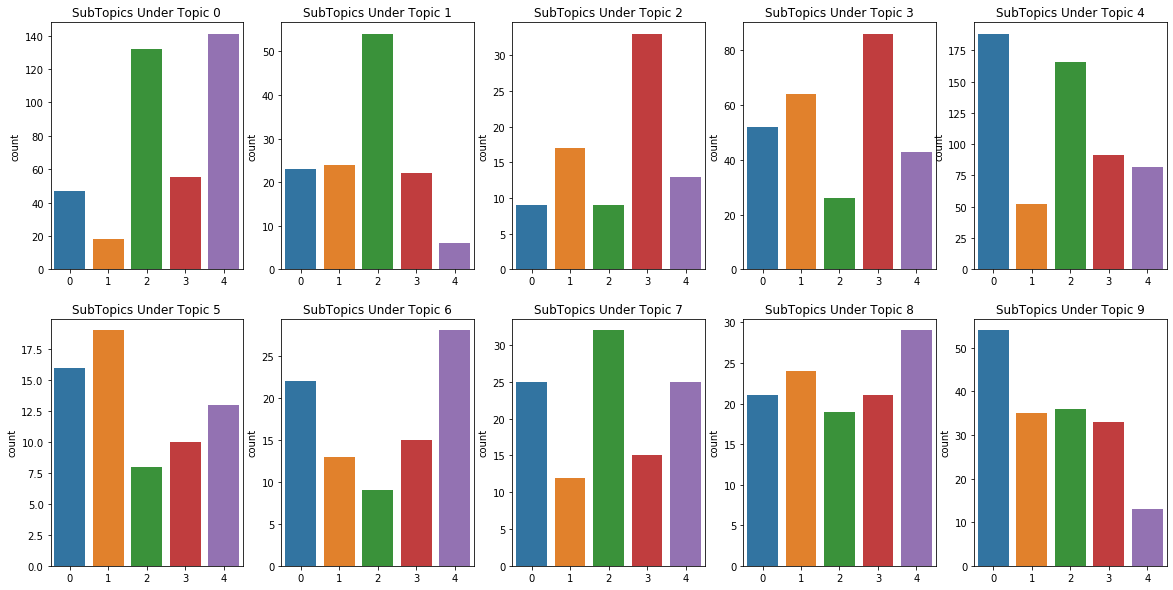

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
f, axes = plt.subplots(2, 5,figsize=(20,10))
axes[0][0].title.set_text('SubTopics Under Topic 0')
axes[0][1].title.set_text('SubTopics Under Topic 1')
axes[0][2].title.set_text('SubTopics Under Topic 2')
axes[0][3].title.set_text('SubTopics Under Topic 3')
axes[0][4].title.set_text('SubTopics Under Topic 4')
axes[1][0].title.set_text('SubTopics Under Topic 5')
axes[1][1].title.set_text('SubTopics Under Topic 6')
axes[1][2].title.set_text('SubTopics Under Topic 7')
axes[1][3].title.set_text('SubTopics Under Topic 8')
axes[1][4].title.set_text('SubTopics Under Topic 9')
sns.countplot([j for j in subtopic(topic0,5).values()],ax=axes[0][0])
sns.countplot([j for j in subtopic(topic1,5).values()],ax=axes[0][1])
sns.countplot([j for j in subtopic(topic2,5).values()],ax=axes[0][2])
sns.countplot([j for j in subtopic(topic3,5).values()],ax=axes[0][3])
sns.countplot([j for j in subtopic(topic4,5).values()],ax=axes[0][4])
sns.countplot([j for j in subtopic(topic5,5).values()],ax=axes[1][0])
sns.countplot([j for j in subtopic(topic6,5).values()],ax=axes[1][1])
sns.countplot([j for j in subtopic(topic7,5).values()],ax=axes[1][2])
sns.countplot([j for j in subtopic(topic8,5).values()],ax=axes[1][3])
sns.countplot([j for j in subtopic(topic9,5).values()],ax=axes[1][4])


## 